# Yali models testing
* [linear regression](#lr)

        

In [ ]:
import pandas as pd
import numpy as np

# Data preprocessing and cleaning


In [ ]:
df=pd.read_excel('final_reg.xls')
df

,Unnamed: 0,WeekDay,Hours,SecMin,Line,o2,o3,o4,o5,o6,o7,o8,o9,o10,o11,o12,o13
0,0,Sun,9,0,921,199,285,325,478,557,620,683,783,858,923,969,1028
1,1,Sun,9,0,921,208,295,335,486,565,625,689,788,863,929,975,1031
2,2,Sun,9,0,921,198,300,340,492,571,634,698,800,873,935,979,1025
3,3,Sun,9,0,921,210,306,346,497,571,631,695,797,874,938,984,1037
4,4,Sun,9,0,921,209,316,356,520,595,653,719,821,897,961,1006,1066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,1575,Tue,18,600,921,214,376,399,485,533,561,624,720,766,804,831,852
1576,1576,Tue,18,2400,921,185,310,348,412,448,480,535,641,688,757,769,789
1577,1577,Tue,19,600,921,203,323,363,415,487,508,630,711,763,827,849,863
1578,1578,Tue,20,1200,921,218,338,366,421,470,500,537,634,689,734,763,782


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,WeekDay,Hours,SecMin,Line,o2,o3,o4,o5,o6,o7,o8,o9,o10,o11,o12,o13
0,Sun,9,0,921,199,285,325,478,557,620,683,783,858,923,969,1028
1,Sun,9,0,921,208,295,335,486,565,625,689,788,863,929,975,1031
2,Sun,9,0,921,198,300,340,492,571,634,698,800,873,935,979,1025
3,Sun,9,0,921,210,306,346,497,571,631,695,797,874,938,984,1037
4,Sun,9,0,921,209,316,356,520,595,653,719,821,897,961,1006,1066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,Tue,18,600,921,214,376,399,485,533,561,624,720,766,804,831,852
1576,Tue,18,2400,921,185,310,348,412,448,480,535,641,688,757,769,789
1577,Tue,19,600,921,203,323,363,415,487,508,630,711,763,827,849,863
1578,Tue,20,1200,921,218,338,366,421,470,500,537,634,689,734,763,782


In [ ]:
dummy_days=pd.get_dummies(df.WeekDay, prefix=None)


In [ ]:
df=pd.concat([df, dummy_days], axis=1)
df

,WeekDay,Hours,SecMin,Line,o2,o3,o4,o5,o6,o7,o8,o9,o10,o11,o12,o13,Mon,Sun,Thu,Tue,Wed
0,Sun,9,0,921,199,285,325,478,557,620,683,783,858,923,969,1028,0,1,0,0,0
1,Sun,9,0,921,208,295,335,486,565,625,689,788,863,929,975,1031,0,1,0,0,0
2,Sun,9,0,921,198,300,340,492,571,634,698,800,873,935,979,1025,0,1,0,0,0
3,Sun,9,0,921,210,306,346,497,571,631,695,797,874,938,984,1037,0,1,0,0,0
4,Sun,9,0,921,209,316,356,520,595,653,719,821,897,961,1006,1066,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,Tue,18,600,921,214,376,399,485,533,561,624,720,766,804,831,852,0,0,0,1,0
1576,Tue,18,2400,921,185,310,348,412,448,480,535,641,688,757,769,789,0,0,0,1,0
1577,Tue,19,600,921,203,323,363,415,487,508,630,711,763,827,849,863,0,0,0,1,0
1578,Tue,20,1200,921,218,338,366,421,470,500,537,634,689,734,763,782,0,0,0,1,0


#Configurate Data

In [ ]:
hour = 16
minSec = 45*60
line = 921
day = [0,0,1,0,0]

# Model prediction for all stations, each station will be model, all data predicted with linear regression.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

In [ ]:
#X for model station o2
X = df[['Hours', 'SecMin', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed']]
y = df['o2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ml = LinearRegression()
ml.fit(X_train, y_train)
y_pred = ml.predict(X_test)
o2 = ml.predict([[hour,minSec,day[0],day[1],day[2],day[3],day[4]]])
o2[0]

237.89288439798983

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Max Error: %f" % (max_error(y_test,y_pred)))
print("Mean Absolute Error: %f" % (mean_absolute_error(y_test,y_pred)))
print("R^2: %f" % (r2_score(y_test,y_pred)))
print("RMSE: %f" % (rmse))

Max Error: 294.535337
Mean Absolute Error: 27.934105
R^2: 0.065256
RMSE: 47.393582


Text(0.5, 1.0, 'Actual vs Predicted')

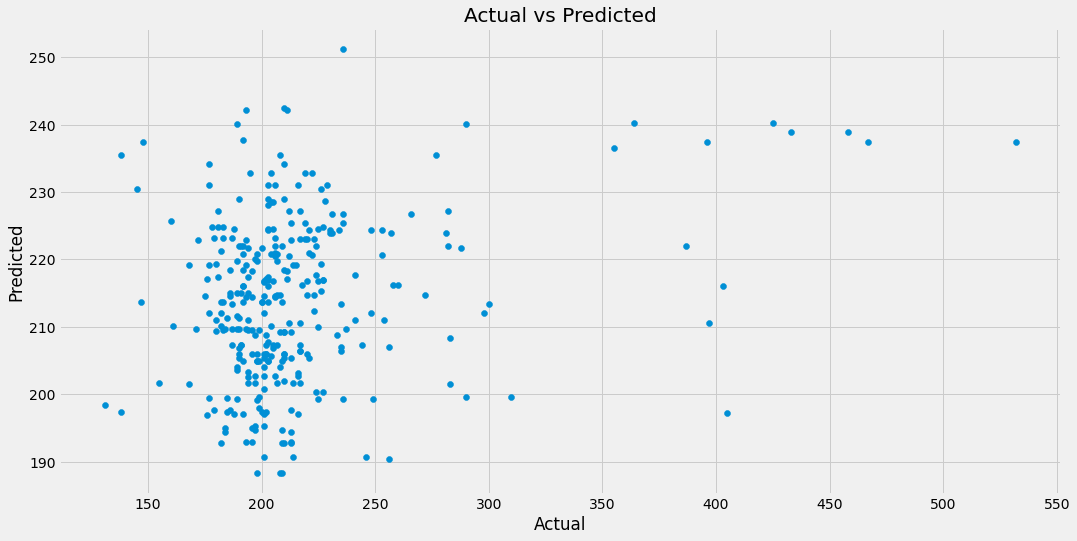

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [ ]:
#X for model station o3
X = df[['Hours', 'SecMin', 'o2', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed']]
y = df['o3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ml = LinearRegression()
ml.fit(X_train, y_train)
y_pred = ml.predict(X_test)
o3 = ml.predict([[hour,minSec,o2[0],day[0],day[1],day[2],day[3],day[4]]])
o3[0]

340.3856432816864

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Max Error: %f" % (max_error(y_test,y_pred)))
print("Mean Absolute Error: %f" % (mean_absolute_error(y_test,y_pred)))
print("R^2: %f" % (r2_score(y_test,y_pred)))
print("RMSE: %f" % (rmse))

Max Error: 159.789989
Mean Absolute Error: 26.542634
R^2: 0.692879
RMSE: 35.894949


Text(0.5, 1.0, 'Actual vs Predicted')

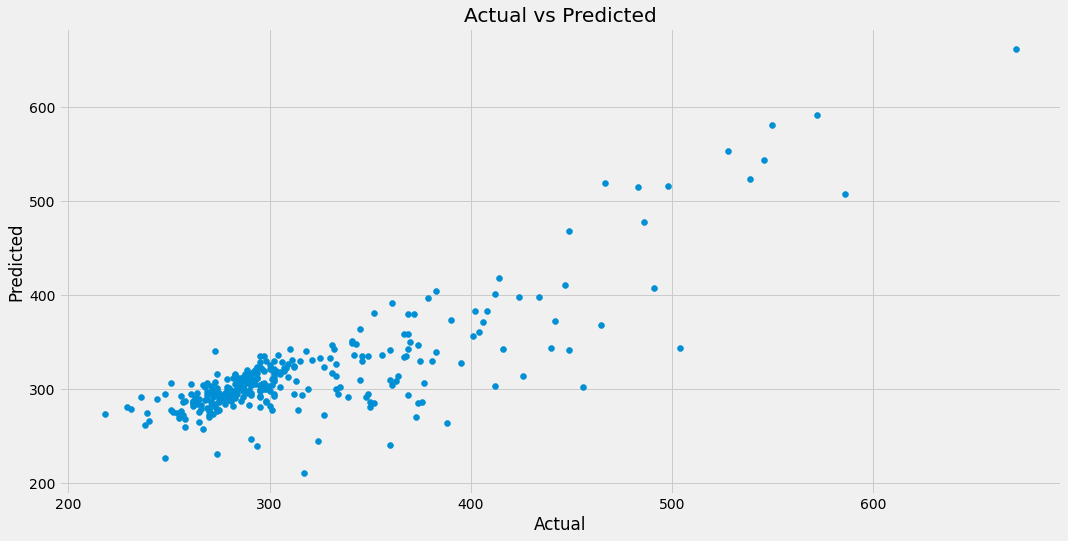

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [ ]:
#X for model station o4
X = df[['Hours', 'SecMin', 'o2', 'o3', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed']]
y = df['o4']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ml = LinearRegression()
ml.fit(X_train, y_train)
y_pred = ml.predict(X_test)
o4 = ml.predict([[hour,minSec,o2[0],o3[0],day[0],day[1],day[2],day[3],day[4]]])
o4[0]

386.5481718335297

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Max Error: %f" % (max_error(y_test,y_pred)))
print("Mean Absolute Error: %f" % (mean_absolute_error(y_test,y_pred)))
print("R^2: %f" % (r2_score(y_test,y_pred)))
print("RMSE: %f" % (rmse))

Max Error: 199.837373
Mean Absolute Error: 12.176235
R^2: 0.889185
RMSE: 23.837171


Text(0.5, 1.0, 'Actual vs Predicted')

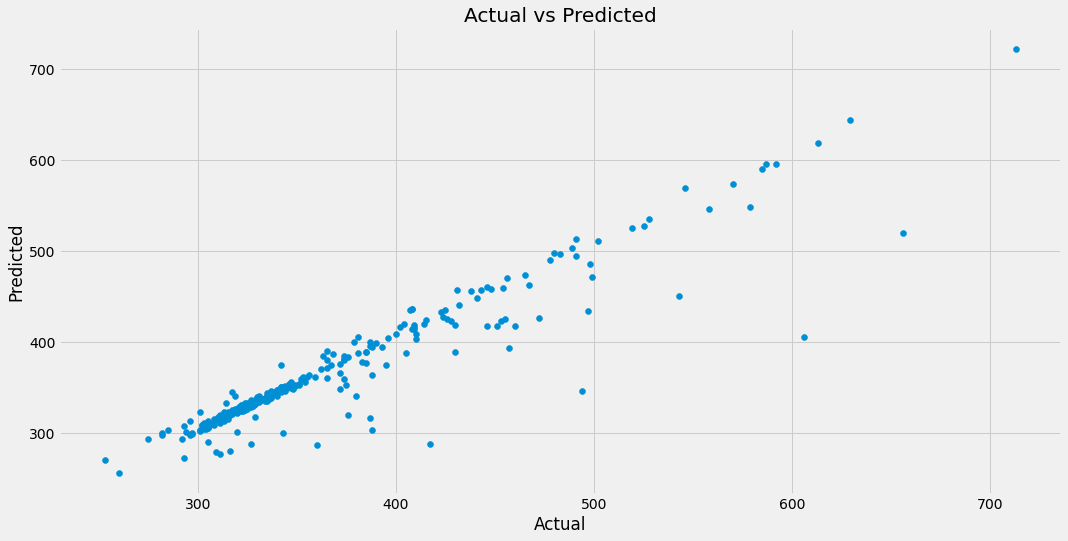

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [ ]:
#X for model station o5
X = df[['Hours', 'SecMin', 'o2', 'o3', 'o4', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed']]
y = df['o5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ml = LinearRegression()
ml.fit(X_train, y_train)
y_pred = ml.predict(X_test)
o5 = ml.predict([[hour,minSec,o2[0],o3[0],o4[0],day[0],day[1],day[2],day[3],day[4]]])
o5[0]

521.2199588203474

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Max Error: %f" % (max_error(y_test,y_pred)))
print("Mean Absolute Error: %f" % (mean_absolute_error(y_test,y_pred)))
print("R^2: %f" % (r2_score(y_test,y_pred)))
print("RMSE: %f" % (rmse))

Max Error: 122.255586
Mean Absolute Error: 28.171133
R^2: 0.757603
RMSE: 38.186834


Text(0.5, 1.0, 'Actual vs Predicted')

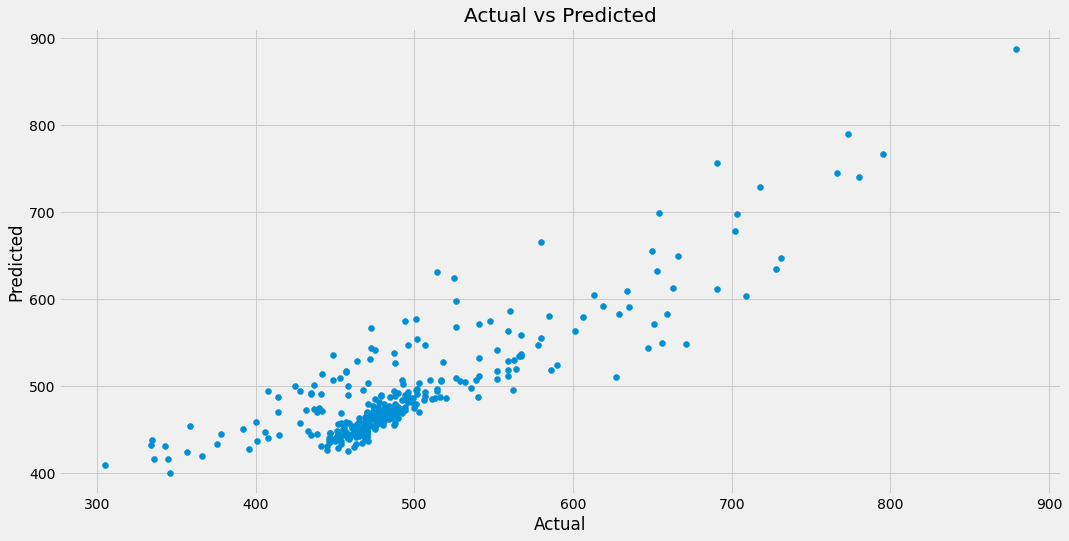

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [ ]:
#X for model station o6
X = df[['Hours', 'SecMin', 'o2', 'o3', 'o4','o5', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed']]
y = df['o6']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ml = LinearRegression()
ml.fit(X_train, y_train)
y_pred = ml.predict(X_test)
o6 = ml.predict([[hour,minSec,o2[0],o3[0],o4[0],o5[0],day[0],day[1],day[2],day[3],day[4]]])
o6[0]

627.6995446342698

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Max Error: %f" % (max_error(y_test,y_pred)))
print("Mean Absolute Error: %f" % (mean_absolute_error(y_test,y_pred)))
print("R^2: %f" % (r2_score(y_test,y_pred)))
print("RMSE: %f" % (rmse))

Max Error: 258.954485
Mean Absolute Error: 22.713144
R^2: 0.843205
RMSE: 38.852743


Text(0.5, 1.0, 'Actual vs Predicted')

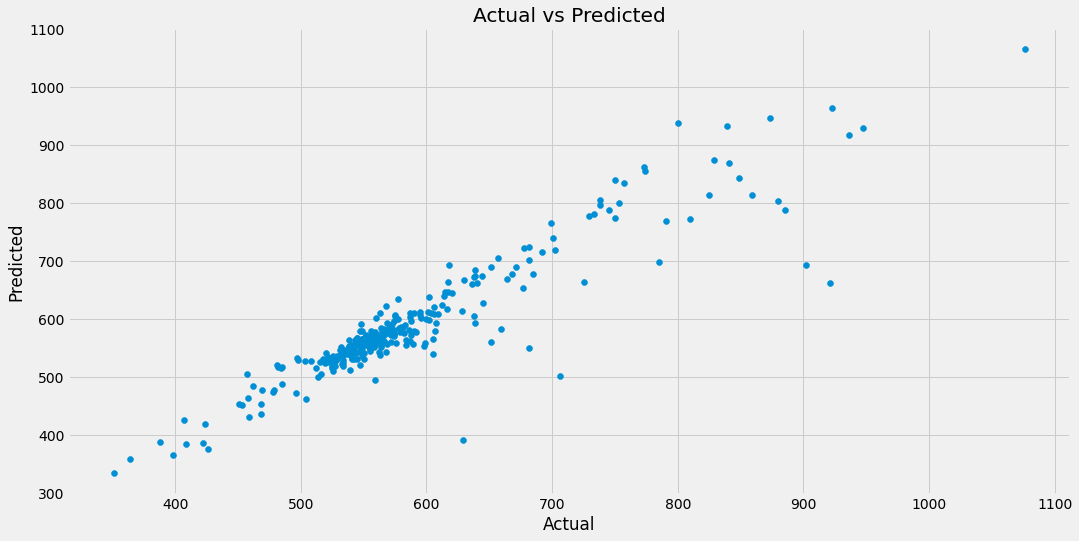

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [ ]:
#X for model station o7
X = df[['Hours', 'SecMin', 'o2', 'o3', 'o4','o5','o6', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed']]
y = df['o7']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ml = LinearRegression()
ml.fit(X_train, y_train)
y_pred = ml.predict(X_test)
o7 = ml.predict([[hour,minSec,o2[0],o3[0],o4[0],o5[0],o6[0],day[0],day[1],day[2],day[3],day[4]]])
o7[0]

690.9075813998514

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Max Error: %f" % (max_error(y_test,y_pred)))
print("Mean Absolute Error: %f" % (mean_absolute_error(y_test,y_pred)))
print("R^2: %f" % (r2_score(y_test,y_pred)))
print("RMSE: %f" % (rmse))

Max Error: 128.764294
Mean Absolute Error: 10.768501
R^2: 0.973527
RMSE: 17.497508


Text(0.5, 1.0, 'Actual vs Predicted')

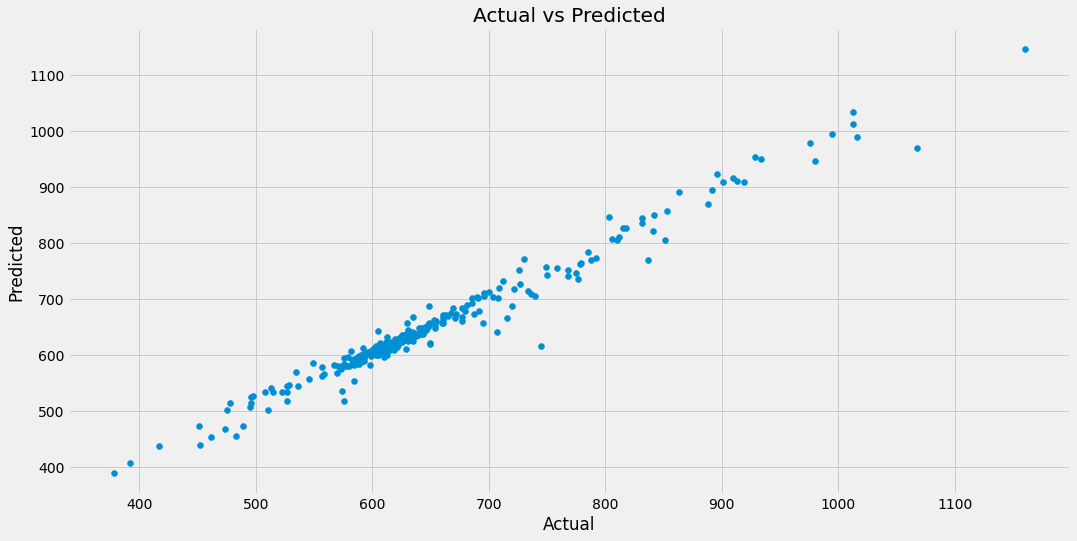

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [ ]:
#X for model station o8
X = df[['Hours', 'SecMin', 'o2', 'o3', 'o4','o5','o6','o7', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed']]
y = df['o8']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ml = LinearRegression()
ml.fit(X_train, y_train)
y_pred = ml.predict(X_test)
o8 = ml.predict([[hour,minSec,o2[0],o3[0],o4[0],o5[0],o6[0],o7[0],day[0],day[1],day[2],day[3],day[4]]])
o8[0]

758.7592993275758

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Max Error: %f" % (max_error(y_test,y_pred)))
print("Mean Absolute Error: %f" % (mean_absolute_error(y_test,y_pred)))
print("R^2: %f" % (r2_score(y_test,y_pred)))
print("RMSE: %f" % (rmse))

Max Error: 130.166348
Mean Absolute Error: 6.513243
R^2: 0.985887
RMSE: 13.130303


Text(0.5, 1.0, 'Actual vs Predicted')

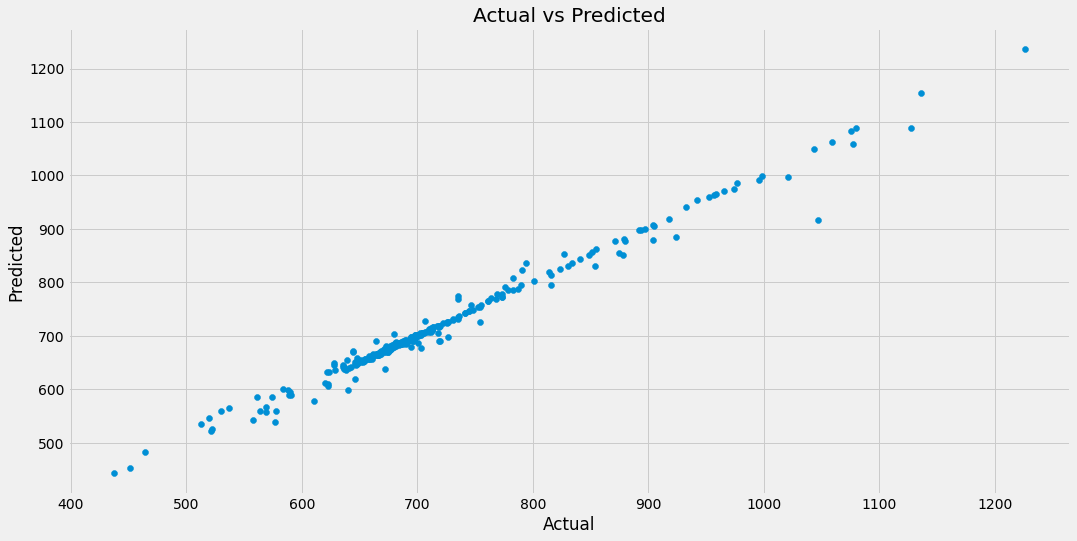

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [ ]:
#X for model station o9
X = df[['Hours', 'SecMin', 'o2', 'o3', 'o4','o5','o6','o7','o8', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed']]
y = df['o9']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ml = LinearRegression()
ml.fit(X_train, y_train)
y_pred = ml.predict(X_test)
o9 = ml.predict([[hour,minSec,o2[0],o3[0],o4[0],o5[0],o6[0],o7[0],o8[0],day[0],day[1],day[2],day[3],day[4]]])
o9[0]

859.4329726502635

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Max Error: %f" % (max_error(y_test,y_pred)))
print("Mean Absolute Error: %f" % (mean_absolute_error(y_test,y_pred)))
print("R^2: %f" % (r2_score(y_test,y_pred)))
print("RMSE: %f" % (rmse))

Max Error: 60.265158
Mean Absolute Error: 6.811227
R^2: 0.988927
RMSE: 11.975092


Text(0.5, 1.0, 'Actual vs Predicted')

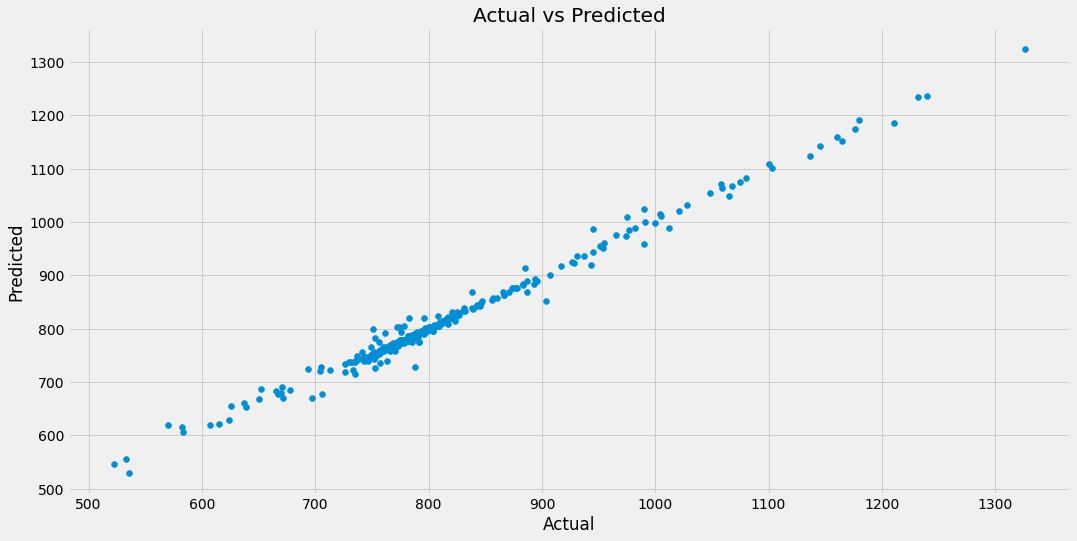

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [ ]:
#X for model station o10
X = df[['Hours', 'SecMin', 'o2', 'o3', 'o4','o5','o6','o7','o8','o9', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed']]
y = df['o10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ml = LinearRegression()
ml.fit(X_train, y_train)
y_pred = ml.predict(X_test)
o10 = ml.predict([[hour,minSec,o2[0],o3[0],o4[0],o5[0],o6[0],o7[0],o8[0],o9[0],day[0],day[1],day[2],day[3],day[4]]])
o10[0]

931.015701571287

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Max Error: %f" % (max_error(y_test,y_pred)))
print("Mean Absolute Error: %f" % (mean_absolute_error(y_test,y_pred)))
print("R^2: %f" % (r2_score(y_test,y_pred)))
print("RMSE: %f" % (rmse))

Max Error: 48.298652
Mean Absolute Error: 5.891090
R^2: 0.992635
RMSE: 9.915018


Text(0.5, 1.0, 'Actual vs Predicted')

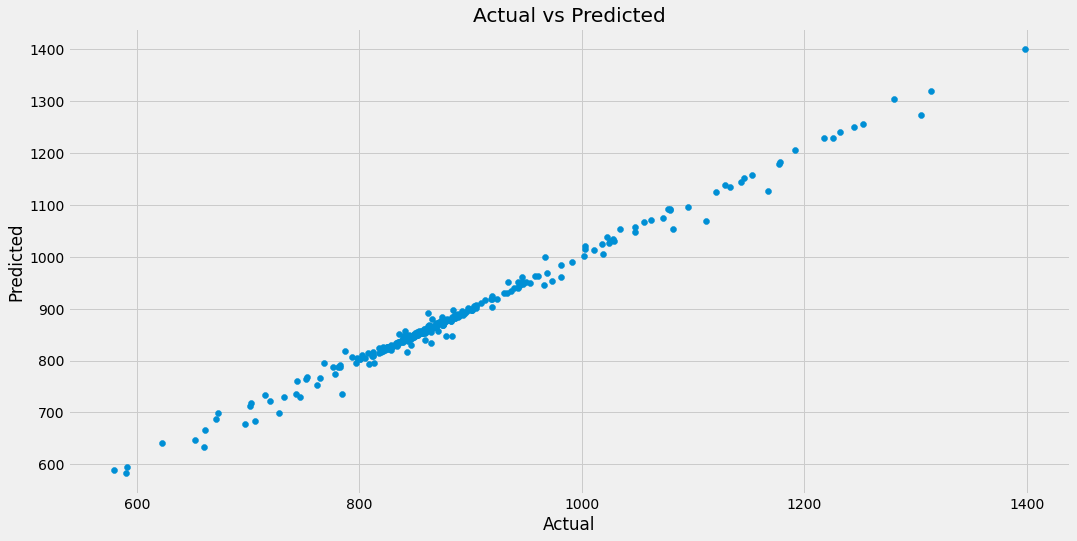

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [ ]:
#X for model station o11
X = df[['Hours', 'SecMin', 'o2', 'o3', 'o4','o5','o6','o7','o8','o9','o10', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed']]
y = df['o11']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ml = LinearRegression()
ml.fit(X_train, y_train)
y_pred = ml.predict(X_test)
o11 = ml.predict([[hour,minSec,o2[0],o3[0],o4[0],o5[0],o6[0],o7[0],o8[0],o9[0],o10[0],day[0],day[1],day[2],day[3],day[4]]])
o11[0]

991.1977362456256

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Max Error: %f" % (max_error(y_test,y_pred)))
print("Mean Absolute Error: %f" % (mean_absolute_error(y_test,y_pred)))
print("R^2: %f" % (r2_score(y_test,y_pred)))
print("RMSE: %f" % (rmse))

Max Error: 57.747326
Mean Absolute Error: 5.432553
R^2: 0.993405
RMSE: 9.612984


Text(0.5, 1.0, 'Actual vs Predicted')

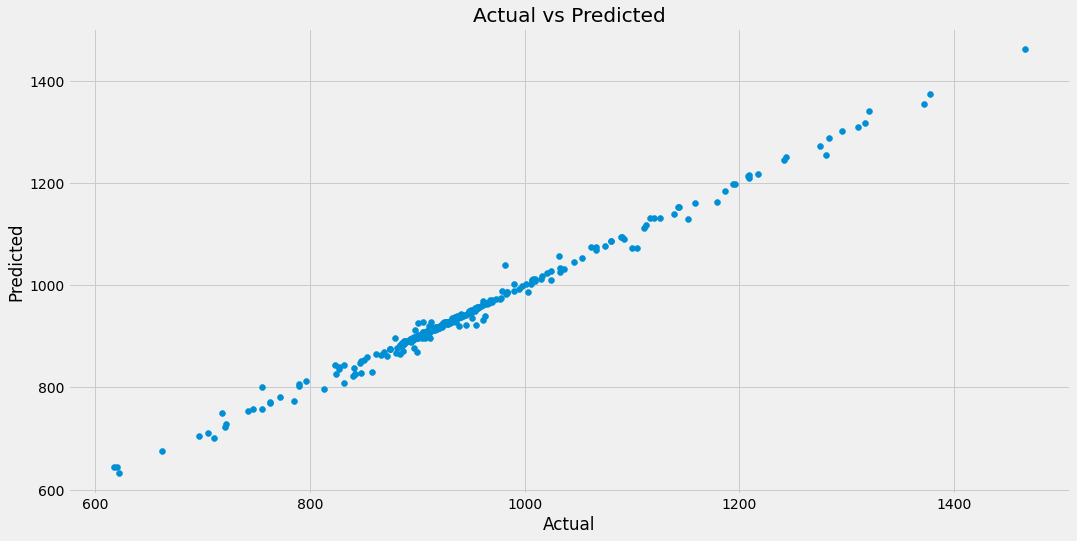

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [ ]:
#X for model station o12
X = df[['Hours', 'SecMin', 'o2', 'o3', 'o4','o5','o6','o7','o8','o9','o10','o11', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed']]
y = df['o12']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ml = LinearRegression()
ml.fit(X_train, y_train)
y_pred = ml.predict(X_test)
o12 = ml.predict([[hour,minSec,o2[0],o3[0],o4[0],o5[0],o6[0],o7[0],o8[0],o9[0],o10[0],o11[0],day[0],day[1],day[2],day[3],day[4]]])
o12[0]

1033.588839573234

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Max Error: %f" % (max_error(y_test,y_pred)))
print("Mean Absolute Error: %f" % (mean_absolute_error(y_test,y_pred)))
print("R^2: %f" % (r2_score(y_test,y_pred)))
print("RMSE: %f" % (rmse))

Max Error: 47.312399
Mean Absolute Error: 4.182011
R^2: 0.995639
RMSE: 8.069463


Text(0.5, 1.0, 'Actual vs Predicted')

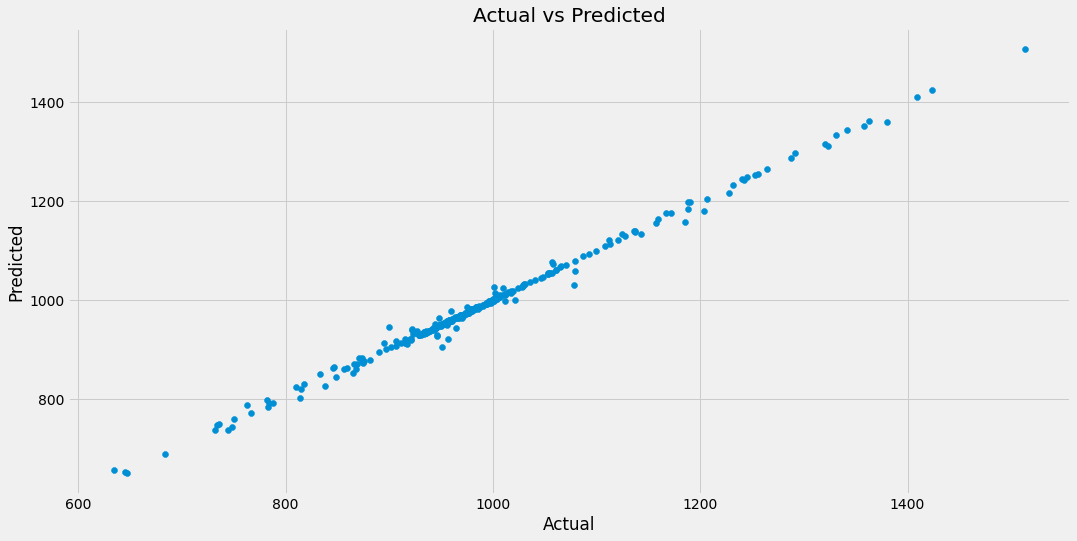

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [ ]:
#X for model station o13
X = df[['Hours', 'SecMin', 'o2', 'o3', 'o4','o5','o6','o7','o8','o9','o10','o11','o12', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed']]
y = df['o13']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ml = LinearRegression()
ml.fit(X_train, y_train)
y_pred = ml.predict(X_test)
o13 = ml.predict([[hour,minSec,o2[0],o3[0],o4[0],o5[0],o6[0],o7[0],o8[0],o9[0],o10[0],o11[0],o12[0],day[0],day[1],day[2],day[3],day[4]]])
o13[0]

1076.647109773297

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Max Error: %f" % (max_error(y_test,y_pred)))
print("Mean Absolute Error: %f" % (mean_absolute_error(y_test,y_pred)))
print("R^2: %f" % (r2_score(y_test,y_pred)))
print("RMSE: %f" % (rmse))

Max Error: 62.516610
Mean Absolute Error: 8.142954
R^2: 0.990334
RMSE: 12.530765


Text(0.5, 1.0, 'Actual vs Predicted')

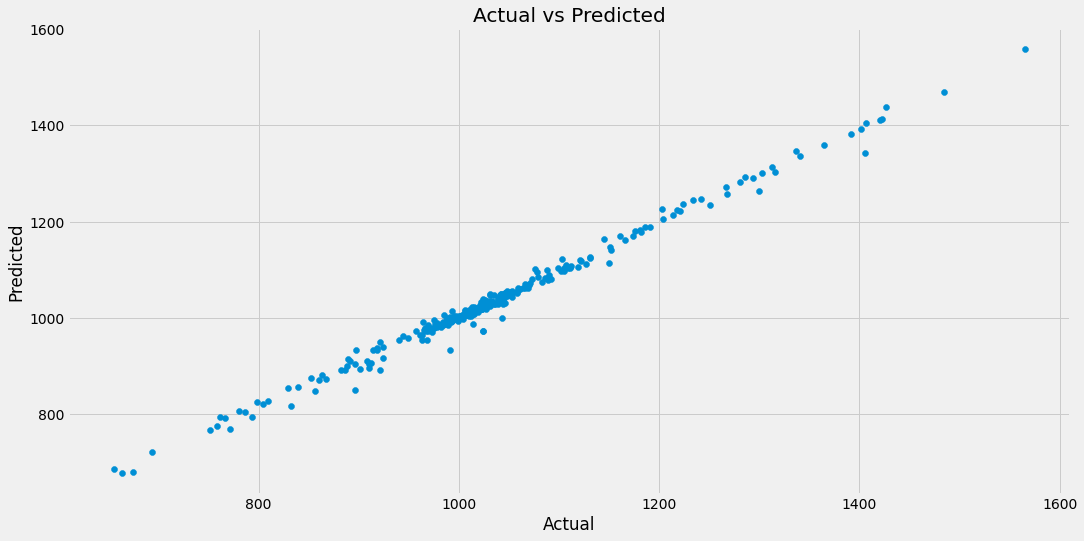

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

#Predicted VS Real

In [ ]:
#Let see predicted data

print("The predicted of the station o2 is:",o2[0])
print("The predicted of the station o3 is:",o3[0])
print("The predicted of the station o4 is:",o4[0])
print("The predicted of the station o5 is:",o5[0])
print("The predicted of the station o6 is:",o6[0])
print("The predicted of the station o7 is:",o7[0])
print("The predicted of the station o8 is:",o8[0])
print("The predicted of the station o9 is:",o9[0])
print("The predicted of the station o10 is:",o10[0])
print("The predicted of the station o11 is:",o11[0])
print("The predicted of the station o12 is:",o12[0])
print("The predicted of the station o13 is:",o13[0])

The predicted of the station o2 is: 237.89288439798983
The predicted of the station o3 is: 340.3856432816864
The predicted of the station o4 is: 386.5481718335297
The predicted of the station o5 is: 521.2199588203474
The predicted of the station o6 is: 627.6995446342698
The predicted of the station o7 is: 690.9075813998514
The predicted of the station o8 is: 758.7592993275758
The predicted of the station o9 is: 859.4329726502635
The predicted of the station o10 is: 931.015701571287
The predicted of the station o11 is: 991.1977362456256
The predicted of the station o12 is: 1033.588839573234
The predicted of the station o13 is: 1076.647109773297


In [ ]:
#Lets see data from df

df_act = df.loc[(df['Hours'] == 16) & (df['SecMin'] == 45*60) & (df['Tue']==1)]
df_act

,WeekDay,Hours,SecMin,Line,o2,o3,o4,o5,o6,o7,o8,o9,o10,o11,o12,o13,Mon,Sun,Thu,Tue,Wed
533,Tue,16,2700,921,249,371,412,569,719,794,859,959,1030,1095,1141,1187,0,0,0,1,0
534,Tue,16,2700,921,243,387,428,613,757,834,899,999,1072,1137,1184,1232,0,0,0,1,0
535,Tue,16,2700,921,221,346,388,586,702,785,849,951,1025,1090,1136,1191,0,0,0,1,0
536,Tue,16,2700,921,203,345,387,627,729,841,904,1005,1079,1144,1190,1242,0,0,0,1,0
537,Tue,16,2700,921,212,357,399,641,731,827,889,992,1069,1134,1179,1227,0,0,0,1,0
538,Tue,16,2700,921,230,383,425,671,757,842,905,1004,1079,1143,1188,1234,0,0,0,1,0
539,Tue,16,2700,921,248,367,408,647,738,815,880,982,1056,1121,1167,1221,0,0,0,1,0
640,Tue,16,2700,921,271,387,429,599,692,799,864,963,1035,1097,1142,1195,0,0,0,1,0
641,Tue,16,2700,921,292,423,466,633,740,863,931,1033,1105,1168,1213,1269,0,0,0,1,0
642,Tue,16,2700,921,343,480,522,683,788,905,973,1078,1154,1219,1264,1316,0,0,0,1,0
